In [78]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [79]:
def create_lang_vectors(D, key_col_names, count_col):
    key_col = D[key_col_names[0]]
    for i in range(1, len(key_col_names)):
        key_col += '_' + D[key_col_names[i]]
    
    # Group by key and language
    grouped_by_lang = D.groupby([key_col, 'lang'])[count_col].sum().unstack(0)
    grouped_by_lang = grouped_by_lang.fillna(0)
    
    # Normalize counts
    lang_totals = grouped_by_lang.sum(axis=1)
    return (grouped_by_lang.T / lang_totals).T
    
def create_lang_dist_vectors(D, key_col_names, dist_col):
    key_col = D[key_col_names[0]]
    for i in range(1, len(key_col_names)):
        key_col += '_' + D[key_col_names[i]]
    
    # Group by key and language, calculating mean dist
    total_counts = all_counts.groupby([key_col, 'lang']).sum()
    return (total_counts[dist_col] / total_counts['count']).unstack(0).fillna(0)


In [80]:
all_langs = ['basque', 'bulgarian', 'croatian', 'czech', 'danish', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hungarian', 'indonesian', 'irish', 'italian', 'persian', 'spanish', 'swedish']
rest_langs = list(all_langs)
rest_langs.remove('danish')
nordic_langs = ['swedish']
germanic_langs = ['english', 'german', 'swedish']

In [81]:
all_counts = pd.read_csv("../data/all_counts.csv", index_col=0)

# Create a new column for the universal part of the relation names
all_counts['deprel_full'] = all_counts['deprel']
all_counts['deprel'] = all_counts['deprel'].str.split(":").str[0]
all_counts['abs_dist'] = all_counts['left_dist'] + all_counts['right_dist']


### Relative frequencies

0.0


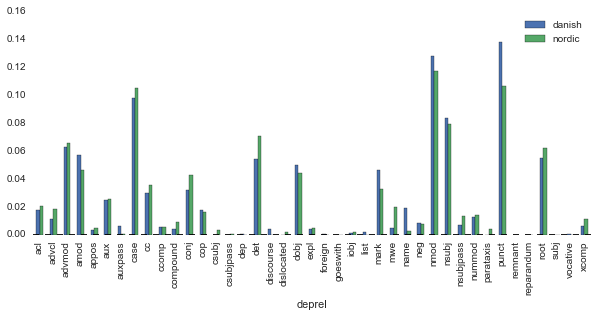

In [129]:
fig, ax = plt.subplots(figsize=(10,4))
lang_vectors = create_lang_vectors(all_counts, ['deprel'], 'count')

ax.set_ylim((0,0.16))
#compare_langs = lang_vectors.ix[nordic_langs].mean()
#danish = lang_vectors.ix['danish']
#compare_df = pd.DataFrame({'nordic': compare_langs, 'danish': danish})
#compare_df.plot(kind='bar', ax=ax)
#plt.savefig("deprel-nordic.pdf")

compare_langs_all = lang_vectors.ix[all_langs].mean()
nordic = lang_vectors.ix[nordic_langs].mean()
germanic = lang_vectors.ix[germanic_langs].mean()

danish = lang_vectors.ix['danish']
print(danish['subj'])
#compare_df = pd.DataFrame({'all': compare_langs_all, 'danish': danish, 'nordic': nordic, 'germanic': germanic})
#compare_df = pd.DataFrame({ 'danish': danish, 'rest': compare_langs_all})
compare_df = pd.DataFrame({ 'danish': danish, 'nordic': nordic})

compare_df.plot(kind='bar', ax=ax)
plt.savefig("deprel-nordic.pdf")
#plt.savefig("deprel-all.pdf")



## Dependency lengths

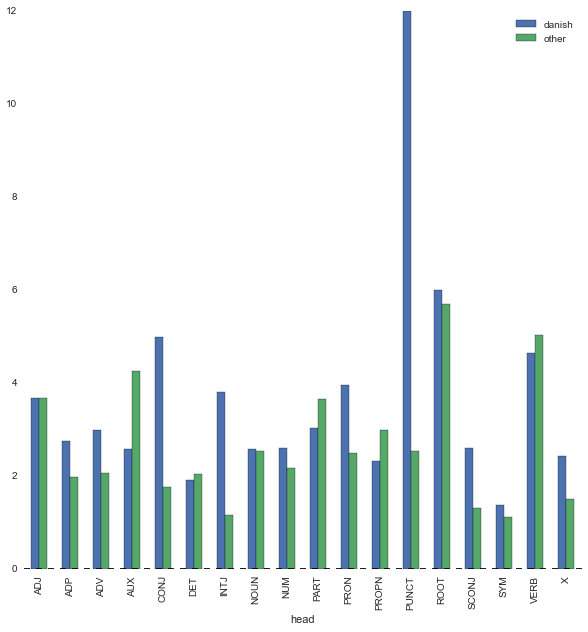

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
lang_vectors = create_lang_dist_vectors(all_counts, ['head'], 'abs_dist')

compare_langs = lang_vectors.ix[germanic_langs].mean()
danish = lang_vectors.ix['danish']
compare_df = pd.DataFrame({'other': compare_langs, 'danish': danish})
compare_df.plot(kind='bar', ax=ax)

## Projection into 2D

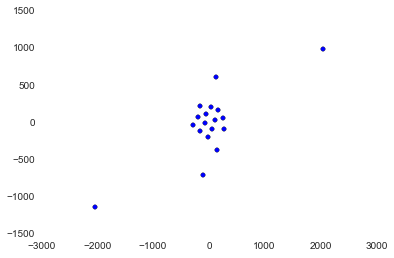

In [84]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

lang_vectors = create_lang_vectors(all_counts, ['head', 'deprel', 'dep'], 'count')

svd = TruncatedSVD(50)

svd_tranformed = svd.fit_transform(lang_vectors)
tsne = TSNE()
lowdim = tsne.fit_transform(svd_tranformed)
plt.scatter(lowdim[:,0], lowdim[:, 1])

0.150164965125 -0.0800552850528 basque
0.195985494569 -0.0458561834957 bulgarian
0.160053335275 -0.050275781426 croatian
0.18478283197 -0.0471412371526 czech
0.163846404249 -0.00397632106382 danish
0.14281728409 0.0199807876888 english
0.148721200008 -0.076292212657 finnish
0.183411191312 0.0732222015379 french
0.163530999658 0.0528348200758 german
0.159607384837 -0.0932801863481 greek
0.177931815715 0.0286825560319 hebrew
0.184951349811 0.0130171763446 hungarian
0.134187464566 0.00264319314726 indonesian
0.154085444856 0.0475900850026 irish
0.203872756304 0.0853736471926 italian
0.177305819339 -0.0322998566582 persian
0.182269648743 0.0758520931566 spanish
0.165980581962 -0.00586711631554 swedish


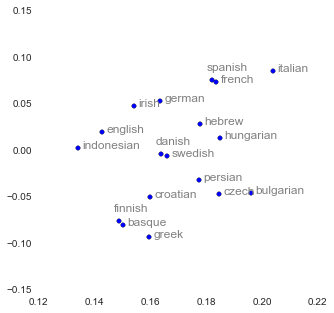

In [121]:
from sklearn.decomposition import TruncatedSVD
fig, ax = plt.subplots(figsize=(5,5))
lang_vectors = create_lang_vectors(all_counts, ['head', 'deprel', 'dep'], 'count')
svd = TruncatedSVD(50)

svd_transformed = svd.fit_transform(lang_vectors)
plt.scatter(svd_transformed[:,0], svd_transformed[:, 1])
for lang,x,y in zip(lang_vectors.index,svd_transformed[:,0], svd_transformed[:, 1]):
    print(x,y,lang)
    if lang in ["danish","spanish","finnish"]:
        ax.annotate(lang, xy=(x, y),color='gray',xytext=(-5,10),textcoords='offset points',size=12)
    else:
        ax.annotate(lang, xy=(x, y),color='gray',xytext=(+5,0),textcoords='offset points',size=12)
plt.savefig("triples-svd.pdf")

In [86]:
lowdim

array([[-2040.28164802, -1127.44785021],
       [   47.63303668,   -71.60643944],
       [ -277.99188942,   -19.40941983],
       [   36.49376975,   212.16015642],
       [ -111.22451017,  -692.97390927],
       [  135.39578996,   617.85986765],
       [  -21.16210132,  -183.18593359],
       [ -158.29217258,  -109.9338471 ],
       [  160.83147555,   172.70935859],
       [  -71.10678347,    -3.45460215],
       [  147.40399712,  -365.52171935],
       [ -154.54831923,   229.81822927],
       [  104.18863733,    37.39186853],
       [ -190.96753046,    87.89394733],
       [  270.18046927,   -74.5428064 ],
       [ 2041.59347124,  1002.78160162],
       [  248.90155037,    67.97198055],
       [  -48.57922451,   121.42771018]])

In [87]:
from scipy.spatial.distance import pdist, squareform
lang_dists = pd.DataFrame(squareform(pdist(lang_vectors)), index=lang_vectors.index, columns=lang_vectors.index)
lang_dists.mean().order()

lang
danish        0.098624
swedish       0.099966
english       0.108205
german        0.108599
hebrew        0.110051
czech         0.112601
french        0.112963
spanish       0.115608
croatian      0.118531
irish         0.120552
bulgarian     0.124809
italian       0.126396
finnish       0.133188
hungarian     0.134685
persian       0.134961
indonesian    0.137640
basque        0.160765
greek         0.181677
dtype: float64

In [88]:
(lang_vectors > 0).sum().mean()


4.0154849225753875